<font color='blue'>Fecha: 13/11/21</font> 

<font color='red'>***Objetivo***</font>: Script para ver las diferencias en las cuantificaciones entre las diferentes versiones del fasta de t-RNAs junto con el gtf de Julio y el gtf creado por mi que contiene las coordenadas genómicas.

Previamente he modificado los archivos .count de Featurecounts para solo quedarme con las cuantificaciones de t-RNAs, con el siguiente comando en la shell:

- tail -408 Featurecounts_18.1.count >> tRNA_Featurecounts_18.1.count

### 1. Crear un dataframe con las cuantificaciones de Featurecounts de los t-RNAs para cada una de las versiones 

1. Establecer el directorio donde estan los archivos .count y las librerias

In [50]:
library(data.table) # Librería para establecer los nombres de las columnas
library(car)        # Librería para hacer los scatterplots
library(ggplot2)
library(e1071)


Attaching package: ‘dplyr’


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
setwd("/home/rodrigo/Coding/Coding/Data/Featurecounts")

In [3]:
list.files()

[1] "Featurecounts_18.1.count"      "Featurecounts_18.count"       
[3] "Featurecounts_19.count"        "Featurecounts_t19.count"      
[5] "tRNA_Featurecounts_18.1.count" "tRNA_Featurecounts_18.count"  
[7] "tRNA_Featurecounts_19.count"   "tRNA_Featurecounts_t19.count"

2. Crear dataframes vacios para guardar cada una de las versiones de las cuantificaciones

In [4]:
df_t18.1<-data.frame()
df_t18<-data.frame()
df_t19<-data.frame()
df_tc19<-data.frame()

3. Leemos la matriz de datos de Feature counts y la metemos en un dataframe

In [5]:
table_18.1 <- read.table('tRNA_Featurecounts_18.1.count')
table_18<-read.table('tRNA_Featurecounts_18.count')
table_19<-read.table('tRNA_Featurecounts_19.count')
table_c19<-read.table('tRNA_Featurecounts_t19.count')

In [6]:
df_t18.1<-data.frame(table_18.1)
df_t18<-data.frame(table_18)
df_t19<-data.frame(table_19)
df_tc19<-data.frame(table_c19)

In [7]:
print(df_t18.1)

                   V1                V2 V3 V4 V5 V6       V7    V8    V9    V10
1    tRNA-Ala-AGC-1-1  tRNA-Ala-AGC-1-1  1 72  + 72     1.19  0.33  0.50   0.00
2   tRNA-Ala-AGC-10-1 tRNA-Ala-AGC-10-1  1 73  + 73     1.09  0.00  0.00   0.24
3    tRNA-Ala-AGC-2-1  tRNA-Ala-AGC-2-1  1 72  + 72     6.18  0.75  1.14   1.31
4    tRNA-Ala-AGC-2-2  tRNA-Ala-AGC-2-2  1 72  + 72     6.18  0.75  1.14   1.31
5    tRNA-Ala-AGC-3-1  tRNA-Ala-AGC-3-1  1 72  + 72    45.11  3.42  3.87   9.19
6    tRNA-Ala-AGC-4-1  tRNA-Ala-AGC-4-1  1 73  + 73    12.23  0.89  0.50   0.25
7    tRNA-Ala-AGC-4-2  tRNA-Ala-AGC-4-2  1 73  + 73    12.23  0.89  0.50   0.25
8    tRNA-Ala-AGC-5-1  tRNA-Ala-AGC-5-1  1 73  + 73     3.01  0.00  0.00   0.24
9    tRNA-Ala-AGC-5-2  tRNA-Ala-AGC-5-2  1 73  + 73     3.01  0.00  0.00   0.24
10   tRNA-Ala-AGC-5-3  tRNA-Ala-AGC-5-3  1 73  + 73     3.01  0.00  0.00   0.24
11   tRNA-Ala-AGC-6-1  tRNA-Ala-AGC-6-1  1 73  + 73    71.28  1.35  1.07   0.90
12   tRNA-Ala-AGC-7-1  tRNA-Ala-AGC-7-1 

4.Cambiamos los nombres de las columnas para poder guiarnos y saber cuales son las muestras

In [8]:
names(`df_t18.1`)

[1] "V1"  "V2"  "V3"  "V4"  "V5"  "V6"  "V7"  "V8"  "V9"  "V10" "V11" "V12"
[13] "V13" "V14" "V15" "V16" "V17" "V18" "V19"

In [9]:
setnames(df_t18.1, old=c('V1','V2','V3','V4','V5','V6','V7','V8','V9','V10',
                        'V11','V12','V13','V14','V15','V16','V17','V18','V19'),
                        new = c('geneid','tRNAid','start','end','strand','seq_length',
                        'S12','S13','S14','S15','S16','S17','S18','S19','S20','S21',
                        'S22','S23','S24'))

setnames(df_t18, old=c('V1','V2','V3','V4','V5','V6','V7','V8','V9','V10',
                        'V11','V12','V13','V14','V15','V16','V17','V18','V19'),
                        new = c('geneid','tRNAid','start','end','strand','seq_length',
                        'S12','S13','S14','S15','S16','S17','S18','S19','S20','S21',
                        'S22','S23','S24'))

setnames(df_t19, old=c('V1','V2','V3','V4','V5','V6','V7','V8','V9','V10',
                        'V11','V12','V13','V14','V15','V16','V17','V18','V19'),
                        new = c('geneid','tRNAid','start','end','strand','seq_length',
                        'S12','S13','S14','S15','S16','S17','S18','S19','S20','S21',
                        'S22','S23','S24'))

setnames(df_tc19, old=c('V1','V2','V3','V4','V5','V6','V7','V8','V9','V10',
                        'V11','V12','V13','V14','V15','V16','V17','V18','V19'),
                        new = c('geneid','tRNAid','start','end','strand','seq_length',
                        'S12','S13','S14','S15','S16','S17','S18','S19','S20','S21',
                        'S22','S23','S24'))



In [10]:
names(`df_t18.1`)

[1] "geneid"     "tRNAid"     "start"      "end"        "strand"    
 [6] "seq_length" "S12"        "S13"        "S14"        "S15"       
[11] "S16"        "S17"        "S18"        "S19"        "S20"       
[16] "S21"        "S22"        "S23"        "S24"

5. Capturar las muestras en una variable para despues verlas enfrentadas graficamente

In [70]:
x<-df_t18.1$S12
y<-df_tc19$S12

df_S12<-data.frame(x,y)
setnames(df_S12, old=c('x','y'), new=c('t18.1', 'c19'))

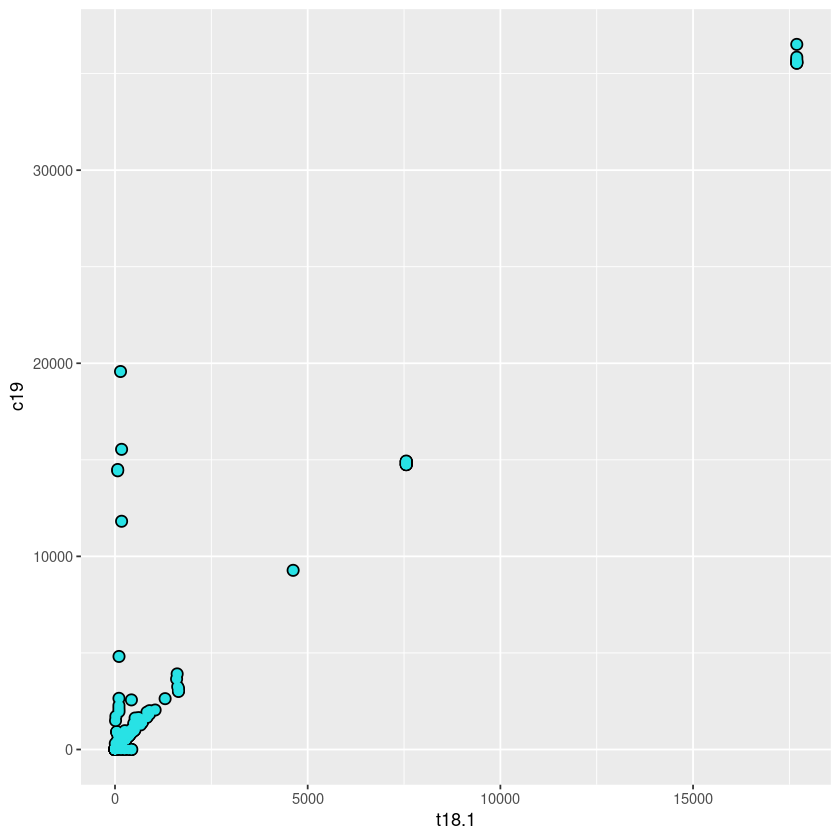

In [82]:
gg<-ggplot(df_S12, aes(x=t18.1, y=c19)) +
    geom_point(aes(x=t18.1),
    color=1,
    size=3) +
    geom_point(aes(y=c19),
    color=5,
    size=2)
    
plot(gg)

In [63]:
print(df_S12)

        18.1      c19
1       1.19     7.17
2       1.09     4.05
3       6.18    31.92
4       6.18    14.27
5      45.11    89.50
6      12.23    25.11
7      12.23    59.94
8       3.01     7.89
9       3.01     8.89
10      3.01    11.89
11     71.28   142.70
12     44.11   108.94
13     27.91    51.59
14     29.67    87.59
15     29.67    56.94
16     73.16   218.29
17      0.10     0.42
18      0.10     0.42
19      0.10     0.42
20      0.16     0.89
21     75.68   152.19
22      0.10     0.42
23      2.48     4.87
24      3.10    23.49
25     86.48   707.67
26     86.48   173.44
27     95.21   184.97
28      2.13    10.35
29      2.13    10.35
30      2.13     4.01
31    173.42   354.31
32     10.07    16.21
33     10.07    16.21
34      9.32    14.46
35    827.98  1673.12
36    827.98  1662.62
37    827.98  1928.73
38    306.60   623.34
39    896.05  2009.60
40    896.05  1826.22
41    119.83   315.88
42     57.99   284.91
43   1612.66  3914.53
44    102.47   215.14
45     71.